In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [39]:
neteda = pd.read_csv('netflix_titles.csv')
neteda.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
#inspecting the structure of the dataset
neteda.info()
neteda.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [41]:
#checking for missing values
neteda.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [42]:
#dropping duplicate values
neteda.drop_duplicates(inplace=True)

In [64]:
#replacing missing values with 'Unknown', 'Not Specified'
neteda['country'].fillna('Unknown', inplace=True)
neteda['cast'].fillna('Not Specified', inplace=True)
neteda['director'].fillna('Not Specified', inplace=True) 

C:\Users\hp\AppData\Local\Temp\ipykernel_1084\2830735713.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_1084\2830735713.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [44]:
#converting date fields 
neteda['date_added'] = neteda['date_added'].str.strip() 
neteda['date_added'] = pd.to_datetime(neteda['date_added'], errors='coerce', format='mixed') 

C:\Users\hp\AppData\Local\Temp\ipykernel_1084\1273838075.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




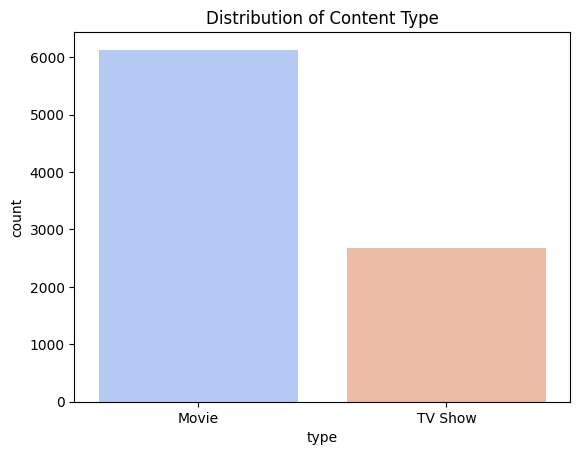

In [45]:
#exploratory analysis
#basic distribution of content type: count of movies vs TV shows
sns.countplot(data=neteda, x='type', palette='coolwarm')
plt.title('Distribution of Content Type')
plt.show() 


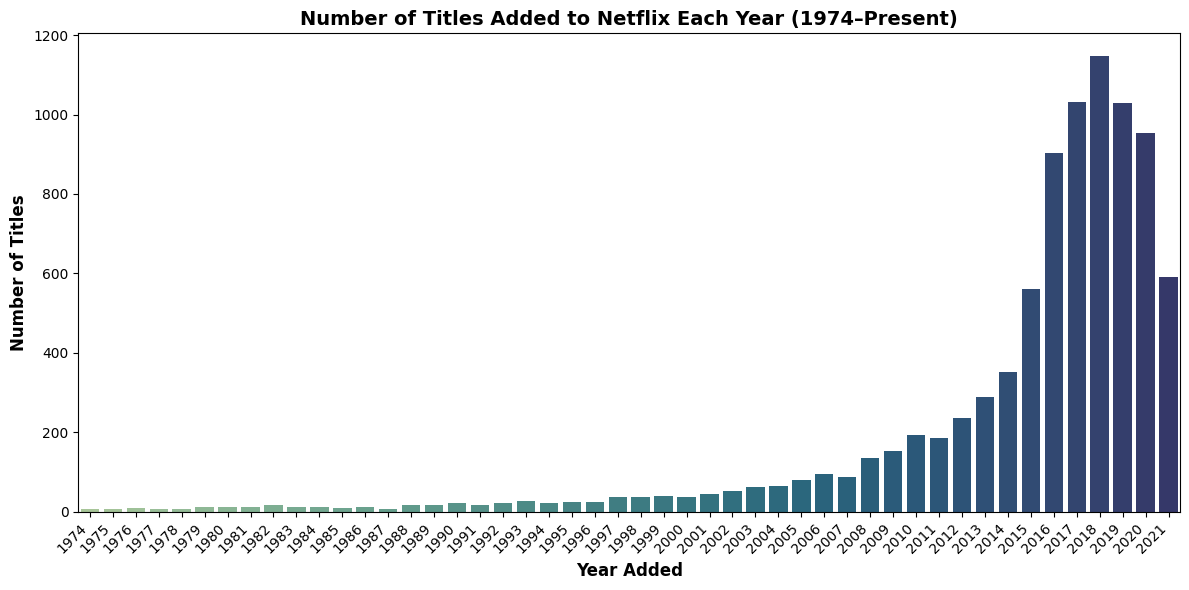

In [46]:
#content added over time
titles_per_year = neteda['release_year'].value_counts().sort_index().reset_index()
titles_per_year.columns = ['release_year', 'count']

#keeping only years from 1974 onward because from earlier tested charts, movies added before 1974 were too little and made the chart too clustered.
titles_per_year = titles_per_year[titles_per_year['release_year'] >= 1974]

plt.figure(figsize=(12,6))
sns.barplot(
    data=titles_per_year,
    x='release_year',
    y='count',
    hue='release_year',
    palette='crest',
    legend=False
)

plt.title('Number of Titles Added to Netflix Each Year (1974–Present)', fontsize=14, fontweight='bold')
plt.xlabel('Year Added', fontsize=12, fontweight= 'bold')
plt.ylabel('Number of Titles', fontsize=12, fontweight='bold' )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() 


C:\Users\hp\AppData\Local\Temp\ipykernel_1084\1951069380.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




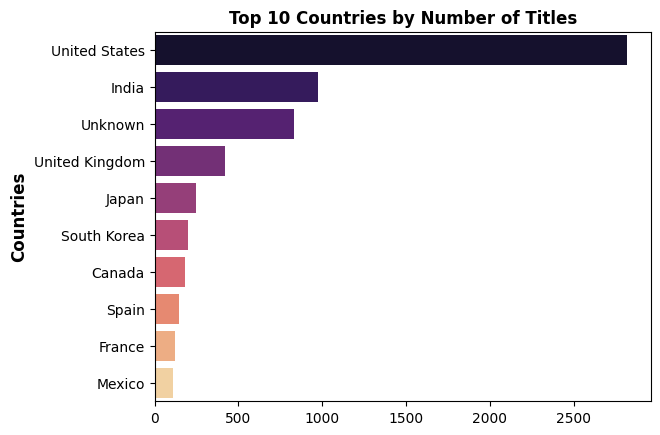

In [47]:
#showing most represented countries
top_countries = neteda['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma',
            legend=False)
plt.title('Top 10 Countries by Number of Titles', fontsize=12, fontweight='bold')
plt.ylabel('Countries', fontsize=12, fontweight= 'bold')
plt.show()


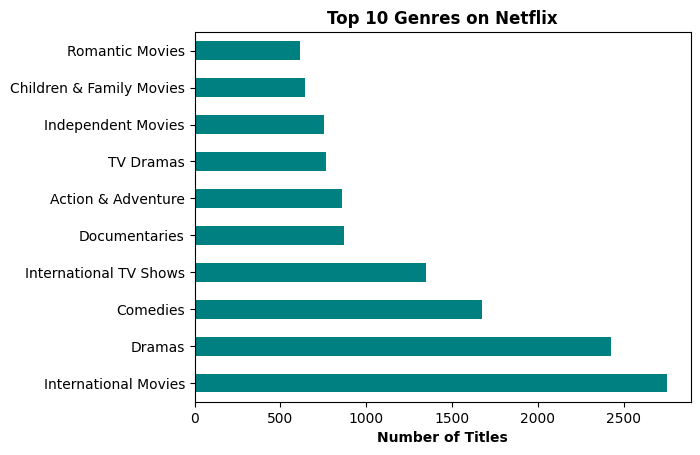

In [ ]:
#showing top 10 genres on Netflix
genre_list = neteda['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = pd.Series(Counter(all_genres)).nlargest(10)

top_genres.plot(kind='barh', color='teal')
plt.title('Top 10 Genres on Netflix', fontweight='bold')
plt.xlabel('Number of Titles', fontweight='bold')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_1084\1530134739.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




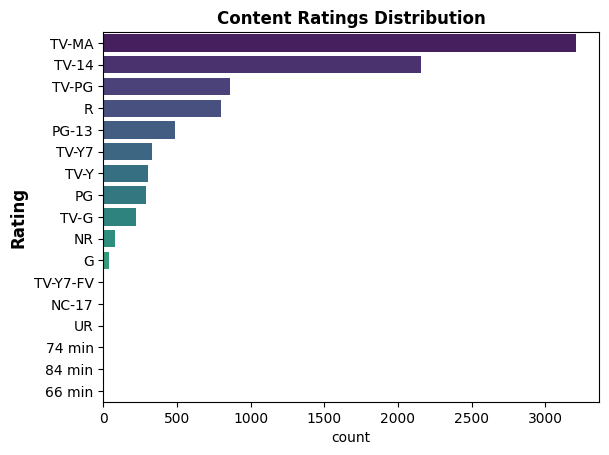

In [65]:
#content rating distribution
sns.countplot(data=neteda, y='rating', order=neteda['rating'].value_counts().index, palette='viridis')
plt.title('Content Ratings Distribution', fontweight='bold')
plt.ylabel('Rating', fontsize=12, fontweight='bold')
plt.show()


In [62]:
#saving the newly cleaned dataset
neteda.to_csv('netflix_cleaned.csv', index=False)
